In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Unit 1, Changes made by an invasive species to an two-species food chain
**Group Member**:
- Fanbo Feng
- Ryan Hsiao
- Davis Li


## Problem description

_Discribe, in words, the situation you would lile to model._

**Statement**:
We want to figure out what happend when we introduce a new specie, like suckermouth fish, to an existing simplified food chain with two species, and letting the suckermouth fish to break the steadystate of the system. Then, we want to find the new steady-state of the three species. The Food chain contain a prey and a predator, and the invasive specie only consume the same food type of prey.

## Question formulation

_What question(s) would you like to answer about your setup above?_

- What will happend if a invasive specie is introduced in a exsiting food chain?
- How the steady state will change over time?
- What is the population change for each specie?
- Whether the invasive species will blend in the food chain or eliminate the food chain?
- Is it good or bad for the invasive species to eliminate or blend in the food chain?

## Mathematical model

_Identify variables, parameters, equations. List your assumptions._


### Variables and Parameters

|    Symbol     | Description                                                          |         Type         |                Unit                | Dimensions |
| :-----------: | -------------------------------------------------------------------- | :------------------: | :--------------------------------: | :---: |
|      $x$      | The population of species X (prey)                                   |  Dependent Variable  |                prey                | N  |
|      $y$      | The population of species Y (predator)                               |  Dependent Variable  |                pred                | N |
|      $z$      | The population of species Z (invasive species)                       |  Dependent Variable  |                inv                 | N |
|      $t$      | Time                                                                 | independent variable |                year                | T |
|     $x_0$     | The initial population of species X (prey)                           |      Parameter       |                prey                | N |
|     $y_0$     | The initial population of species Y (predator)                       |      Parameter       |                pred                | N |
|     $z_0$     | The initial population of invasive species Z (invasive species)      |      Parameter       |                inv                 | N |
|   $\alpha$    | The growth rate of prey (X) in the absence of a predator (Y)         |      Parameter       |         year<sup>-1</sup>          | T<sup>-1</sup> |
|    $\beta$    | The death rate of prey (X) due to the predation                      |      Parameter       | pred<sup>-1</sup>year<sup>-1</sup> | N<sup>-1</sup> T<sup>-1</sup>  |
| $\varepsilon$ | The death rate of prey (X) due to food sharing with invasive species |      Parameter       | inv<sup>-1</sup>year<sup>-1</sup>  | N<sup>-1</sup> T<sup>-1</sup> |
|   $\gamma$    | The natural death rate of predator (Y)                               |      Parameter       |         year<sup>-1</sup>          | T<sup>-1</sup> |
|   $\delta$    | The growth rate of the predator (Y) due to predation on the prey     |      Parameter       | prey<sup>-1</sup>year<sup>-1</sup> | N<sup>-1</sup> T<sup>-1</sup> |
|     $\xi$     | The growth rate of invasive species (Z)                              |      Parameter       |         year<sup>-1</sup>          | T<sup>-1</sup> |
|   $\sigma$    | The death rate of invasive species (Z) due to food sharing with prey |      Parameter       | prey<sup>-1</sup>year<sup>-1</sup> | N<sup>-1</sup> T<sup>-1</sup> |

### Equations

**Governing Equation**:
$$
\begin{align}
\frac{dx}{dt} &= \alpha x - \beta xy - \varepsilon xz\\
\frac{dy}{dt} &= -\gamma y + \delta xy\\
\frac{dz}{dt} &= \xi z - \sigma xz
\end{align}
$$

$$
x(0) = x_0, \quad y(0) = y_0, \quad z(0) = z_0
$$

**Nondemonization**:

Step 1: The population $x$, $y$, and $z$ are the dependent variables; time $t$ is the independent variables.

Step 2: Let $t = [t]t^*$, $x = [x]x^*$, $y = [y]y^*$, $z = [z]z^*$, and substitude these into the equations:
$$
\begin{aligned}
\frac{[x]}{[t]}\frac{dx^*}{dt^*} &= \alpha [x]x^* - \beta [x][y]x^*y^* - \varepsilon [x][z]x^*z^*\\
\frac{[y]}{[t]}\frac{dy^*}{dt^*} &= -\gamma [y]y^* + \delta [x][y]x^*y^*\\
\frac{[z]}{[t]}\frac{dz^*}{dt^*} &= \xi [z]z^* - \sigma [x][z]x^*z^*
\end{aligned}
$$

$$
[x]x^*(0) = x_0 \quad [y]y^*(0) = y_0, \quad [z]z^*(0) = z_0
$$

Step 3: Divide the first 2 eauqtions with the coefficients of $x^*y^*$, and the third one with the coefficent of $x^*z^*$
$$
\begin{aligned}
\frac{1}{\beta [y][t]}\frac{dx^*}{dt^*} &= \frac{\alpha}{\beta[y]} x^* - x^*y^* - \frac{\varepsilon [z]}{\beta [y]}x^*z^*\\
\frac{1}{\delta [x][t]}\frac{dy^*}{dt^*} &= -\frac{\gamma}{\delta[x]}y^* + x^*y^*\\
\frac{1}{\sigma [x][t]}\frac{dz^*}{dt^*} &= \frac{\xi}{\sigma[x]}z^* - x^*z^*
\end{aligned}
$$

$$
x^*(0) = \frac{x_0}{[x]} \quad y^*(0) = \frac{y_0}{[y]}, \quad z^*(0) = \frac{z_0}{[z]}
$$

Step 4: We choose:
$$
[x] = \frac{\gamma}{\delta}, \quad [y]= \frac{\alpha}{\beta}, \quad[z] = \frac{\alpha}{\varepsilon}
$$
Since we can not choose a $[t]$ such that all coefficients are 1, so we choose from:
$$
[t] = \frac{1}{\alpha}, \quad [t] = \frac{1}{\gamma}, \quad [t] = \frac{\delta}{\sigma \gamma}
$$
Let $[t] = \frac{1}{\alpha}$

Step 5: We rewrite the equations:
$$
\begin{aligned}
\frac{dx^*}{dt^*} &= x^* - x^*y^* - x^*z^*\\
\frac{dy^*}{dt^*} &= a(-y^* + x^*y^*)\\
\frac{dz^*}{dt^*} &= bz^* - cx^*z^*
\end{aligned}
$$
$$
x^*(0) = dx_0, \quad y^*(0) = ey_0, \quad z^*(0) = fz_0
$$

where:
$$
a = \frac{\gamma}{\alpha},\quad b = \frac{\xi}{\alpha}, \quad c = \frac{\sigma \gamma}{\alpha \delta},  \quad d = \frac{\delta}{\gamma}, \quad e = \frac{\beta}{\alpha},  \quad f = \frac{\varepsilon}{\alpha}
$$

### Assumptions
- The food chain only contains a single preditor, prey, and invasive specie. 
- There are 3 species in total within the food chain.
- The suckermouth fish only consume seawead, and do not hunt the prey or be hunted by the preditor.
- The prey and the invasive species share the common food.
- The death of the preditor can only be due to natural death.
- The death of the prey can only be due to the predation and the lack of food.
- The death of the invasive species can only due to the lack of food.
- The food for the prey and invasive species is not unlimited.
- The birth and death rate of each species is constant.
- All species the the food chain is all grown.
- Before introducing the invasive species, the food chain of prey and preditor is at an equilibrium state.

### Constraint 
- $x, y, z, t \ge 0$

## How will you answer your questions?

_Explain your approach to studying your model, identify a mathematical quantity you will evaluate to answer your question._




- Use python code to visualize the change in population of the 3 species, and find it steady-state.
- Use system of first-order differential equations to model the process for a invasive species take a part in the food chain.
- Use non-dimensionalization to make all variables and parameters we use is in the same scale.
- The final state of our population for 3 species respectively.


## Steady-state analysis

The steady-state occurs when:
$$
\begin{aligned}
\alpha x - \beta xy - \varepsilon xz &= 0 \\
-\gamma y + \delta xy &= 0\\
\xi z - \sigma xz &= 0
\end{aligned}
$$
The first equation gives us $x = 0$ and $\beta y + \varepsilon z = \alpha$.

The second equations have solutions $y=0$ and $x = \frac{\gamma}{\delta}$

The third equations have solutions $z = 0$ and $x = \frac{\xi}{\sigma}$

We can firstly generate one steady-state with $(x,y,z) = (0, 0, 0)$

And for $x \ne 0$, we have two choice with $x = \frac{\gamma}{\delta}$ and $x = \frac{\xi}{\sigma}$, with these choices of $x$ value, we also have the relation between $y$ and $z$ which should satisfies the equation : $\beta y + \varepsilon z = \alpha$, i.e., $y = \frac{\alpha}{\beta} - \frac{\xi}{\beta}z$

if $y \ne 0$, then must let $x= \frac{\gamma}{\delta}$ to make second equation equal zero, hence we must let $z = 0$,  then $y = \frac{\alpha}{\beta}$.

Similary, if $z \ne 0$, we must have $y=0$, with $x = \frac{\xi}{\sigma}$, $z = \frac{\alpha}{\xi}$

so totally we have 3 steaty-states:

$$
(x,y,z) = (0, 0, 0), \qquad (x,y,z) = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}, 0), \qquad (x,y,z) = (\frac{\xi}{\sigma}, 0, \frac{\alpha}{\xi})
$$


# Implementation

## Parameters values:
- $\alpha$ = $0.33$ $month^{-1}$ = $3.96$ $year^{-1}$ $\approx$ $4$ $year^{-1}$
- $\text{average survival time of prey}$ = $3$ $months$ = $0.25$ $year$
- $\beta$ = $0.2$ $pred^{-1}$ $day^{-1}$ = $73.05$ $pred^{-1}$ $year^{-1}$ $\approx$ $73$ $pred^{-1}$ $year^{-1}$ 
- $\gamma$ = $1$ $year^{-1}$
- $\delta$ = $0.1$ $year^{-1}$ $prey^{-1}$

**Import statements**

**Model with Python**

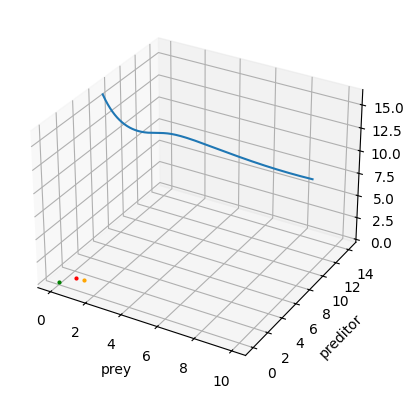

In [5]:
alpha = 1; beta = 1; eps = 1; gamma = 1; delta = 1; xi = 1; sigma = 1
a = gamma/alpha
b = xi/alpha
c = (sigma*gamma)/(alpha/delta)
d = delta/gamma
e = beta/alpha
f = eps/alpha
x0 = d*10; y0 = e*10; z0 = f*10
tF = 1
N = 5000

u0 = [x0, y0, z0]

t = np.linspace(0, tF, N)

def f(u, t):
    dudt = np.zeros(3)
    dudt[0] = u[0] - u[0]*u[1] - u[0]*u[2]
    dudt[1] = a*(-u[1] + u[0]*u[1])
    dudt[2] = b*u[2] - c*u[0]*u[2]
    return dudt

u = spi.odeint(f, u0, t)

plt.figure().add_subplot(projection='3d')
plt.plot(u[:, 0], u[:, 1], u[:, 2])
plt.plot(0, 0, 0, marker='o', markersize=2, color='green')
plt.plot(gamma/delta, alpha/beta, 0, marker='o', markersize=2, color='orange')
plt.plot(xi/sigma, 0, alpha/xi, marker='o', markersize=2, color='red')
plt.xlabel('prey')
plt.ylabel('preditor')
plt.show()


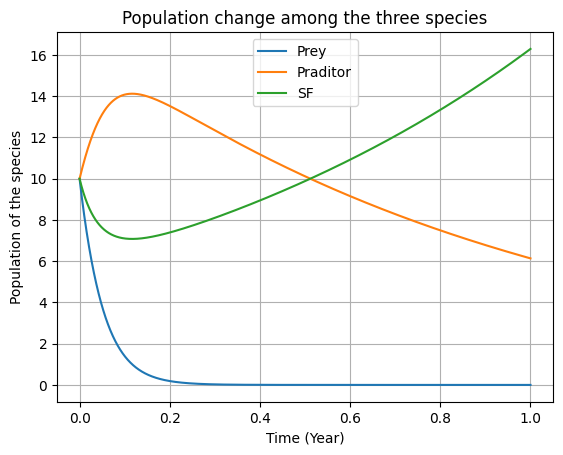

In [6]:
plt.plot(t, u[:, 0])
plt.plot(t, u[:, 1])
plt.plot(t, u[:, 2])
plt.legend(['Prey', 'Praditor', "SF"])
plt.xlabel("Time (Year)")
plt.ylabel("Population of the species")
plt.title("Population change among the three species")
plt.grid()
plt.show()


# Reference

- [This paper has a similar idea for 3 species food chain](https://gw2jh3xr2c.search.serialssolutions.com/?ctx_ver=Z39.88-2004&ctx_enc=info%3Aofi%2Fenc%3AUTF-8&rfr_id=info%3Asid%2Fsummon.serialssolutions.com&rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&rft.genre=article&rft.atitle=A+Lotka-Volterra+Three-Species+Food+Chain&rft.jtitle=Mathematics+magazine&rft.au=Chauvet%2C+Erica&rft.au=Paullet%2C+Joseph+E.&rft.au=Previte%2C+Joseph+P.&rft.au=Walls%2C+Zac&rft.date=2002-10-01&rft.issn=0025-570X&rft.volume=75&rft.issue=4&rft.spage=243&rft_id=info:doi/10.2307%2F3219158&rft.externalDBID=n%2Fa&rft.externalDocID=10_2307_3219158&paramdict=en-us) 